In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd 'content/drive/MyDrive/Internship_EEG_Data'


[Errno 2] No such file or directory: 'content/drive/MyDrive/Internship_EEG_Data'
/content


In [3]:
%pwd

'/content'

In [4]:
%cd "drive/MyDrive/Internship_EEG_Data"

/content/drive/MyDrive/Internship_EEG_Data


In [5]:
pip install mne pyedflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 40.1 MB/s eta 0:00:00


In [6]:
import mne

# Load the EDF file
raw = mne.io.read_raw_edf('10minRecording_EventsAdded.edf', preload=True)


Extracting EDF parameters from /content/drive/MyDrive/Internship_EEG_Data/10minRecording_EventsAdded.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77499  =      0.000 ...   619.992 secs...


Apply Notch Filter & Butterworth Filter

In [7]:
# Apply a Notch Filter at 50 Hz
raw.notch_filter(freqs=50)

# Apply a Butterworth Filter (0.5 Hz - 50 Hz)
raw.filter(l_freq=0.5, h_freq=50)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edg

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Measurement date,"May 07, 2024 03:37:26 GMT"
Experimenter,Unknown
Participant,DevyanshGupta
Digitized points,Not available
Good channels,17 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,125.00 Hz
Highpass,0.50 Hz
Lowpass,50.00 Hz


Segment The Dta

In [8]:
import numpy as np

# Define event times in seconds and their corresponding codes
events = np.array([
    [10, 0, 1],  # Eye close started
    [130, 0, 2], # Eye close ended
    [170, 0, 3], # Eye open started
    [290, 0, 4], # Eye open ended
    [330, 0, 1], # Eye close started
    [430, 0, 2], # Eye close ended
    [490, 0, 3], # Eye open started
    [610, 0, 4]  # Eye open ended
])

# Convert event times to sample indices
event_samples = np.array([[raw.time_as_index(event[0])[0], event[1], event[2]] for event in events])

# Create an events array compatible with MNE
mne_events = np.array(event_samples)

# Define event dictionary
event_id = {'EyeCloseStart': 1, 'EyeCloseEnd': 2, 'EyeOpenStart': 3, 'EyeOpenEnd': 4}

# Define segments based on events (start and end times in seconds)
segments = {
    'eye_close1': (10, 130),
    'eye_open1': (170, 290),
    'eye_close2': (330, 430),
    'eye_open2': (490, 610)
}

# Segment and save data
for name, (start, end) in segments.items():
    segment_data = raw.copy().crop(tmin=start, tmax=end)
    segment_data.save(f'{name}.fif', overwrite=True)


Overwriting existing file.
Writing /content/drive/MyDrive/Internship_EEG_Data/eye_close1.fif


<ipython-input-8-2068db9d89f9>:35: RuntimeWarning: This filename (/content/drive/MyDrive/Internship_EEG_Data/eye_close1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  segment_data.save(f'{name}.fif', overwrite=True)


Closing /content/drive/MyDrive/Internship_EEG_Data/eye_close1.fif
[done]
Overwriting existing file.
Writing /content/drive/MyDrive/Internship_EEG_Data/eye_open1.fif


<ipython-input-8-2068db9d89f9>:35: RuntimeWarning: This filename (/content/drive/MyDrive/Internship_EEG_Data/eye_open1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  segment_data.save(f'{name}.fif', overwrite=True)


Closing /content/drive/MyDrive/Internship_EEG_Data/eye_open1.fif
[done]
Overwriting existing file.
Writing /content/drive/MyDrive/Internship_EEG_Data/eye_close2.fif


<ipython-input-8-2068db9d89f9>:35: RuntimeWarning: This filename (/content/drive/MyDrive/Internship_EEG_Data/eye_close2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  segment_data.save(f'{name}.fif', overwrite=True)


Closing /content/drive/MyDrive/Internship_EEG_Data/eye_close2.fif
[done]
Overwriting existing file.
Writing /content/drive/MyDrive/Internship_EEG_Data/eye_open2.fif


<ipython-input-8-2068db9d89f9>:35: RuntimeWarning: This filename (/content/drive/MyDrive/Internship_EEG_Data/eye_open2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  segment_data.save(f'{name}.fif', overwrite=True)


Closing /content/drive/MyDrive/Internship_EEG_Data/eye_open2.fif
[done]


Save the Processed Data

In [29]:
pip install pyedflib


In [21]:
import pyedflib
import numpy as np

def save_as_edf(raw, filename):
    """
    Save MNE Raw object as EDF using pyedflib.
    """
    data = raw.get_data()
    n_channels = data.shape[0]
    ch_names = raw.info['ch_names']
    sfreq = int(raw.info['sfreq'])
    pmin = data.min(axis=1)
    pmax = data.max(axis=1)

    f = pyedflib.EdfWriter(filename, n_channels=n_channels, file_type=pyedflib.FILETYPE_EDFPLUS)

    channel_info = []
    for i in range(n_channels):
        ch_dict = {
            'label': ch_names[i],
            'dimension': 'uV',
            'sample_rate': sfreq,
            'physical_min': pmin[i],
            'physical_max': pmax[i],
            'digital_min': -32768,
            'digital_max': 32767,
            'transducer': '',
            'prefilter': ''
        }
        channel_info.append(ch_dict)

    f.setSignalHeaders(channel_info)
    f.writeSamples(data)
    f.close()

# Load and save each filtered segment in EDF format
for name in segments.keys():
    segment_data = mne.io.read_raw_fif(f'{name}.fif', preload=True)
    save_as_edf(segment_data, f'{name}_filtered.edf')


Opening raw data file eye_close1.fif...
Isotrak not found
    Range : 1250 ... 16250 =     10.000 ...   130.000 secs
Ready.
Reading 0 ... 15000  =      0.000 ...   120.000 secs...


<ipython-input-21-c061d108f0a8>:38: RuntimeWarning: This filename (eye_close1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  segment_data = mne.io.read_raw_fif(f'{name}.fif', preload=True)
/usr/local/lib/python3.10/dist-packages/pyedflib/edfwriter.py:124: UserWarning: Physical minimum for channel 0 (FP1) is -5.6968434364534914e-05, which has 23 chars, however, EDF+ can only save 8 chars, will be truncated to -5.69684, some loss of precision is to be expected
  warnings.warn('Physical minimum for channel {} ({}) is {}, which has {} chars, '\
/usr/local/lib/python3.10/dist-packages/pyedflib/edfwriter.py:131: UserWarning: Physical minimum for channel 0 (FP1) is 4.6272118197521195e-05, which has 22 chars, however, EDF+ can only save 8 chars, will be truncated to 4.627211, some loss of precision is to be ex

Opening raw data file eye_open1.fif...
Isotrak not found
    Range : 21250 ... 36250 =    170.000 ...   290.000 secs
Ready.
Reading 0 ... 15000  =      0.000 ...   120.000 secs...


<ipython-input-21-c061d108f0a8>:38: RuntimeWarning: This filename (eye_open1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  segment_data = mne.io.read_raw_fif(f'{name}.fif', preload=True)
/usr/local/lib/python3.10/dist-packages/pyedflib/edfwriter.py:124: UserWarning: Physical minimum for channel 0 (FP1) is -0.00021372768969740719, which has 23 chars, however, EDF+ can only save 8 chars, will be truncated to -0.00021, some loss of precision is to be expected
  warnings.warn('Physical minimum for channel {} ({}) is {}, which has {} chars, '\
/usr/local/lib/python3.10/dist-packages/pyedflib/edfwriter.py:131: UserWarning: Physical minimum for channel 0 (FP1) is 4.8712099669501185e-05, which has 22 chars, however, EDF+ can only save 8 chars, will be truncated to 4.871209, some loss of precision is to be exp

Opening raw data file eye_close2.fif...
Isotrak not found
    Range : 41250 ... 53750 =    330.000 ...   430.000 secs
Ready.
Reading 0 ... 12500  =      0.000 ...   100.000 secs...


<ipython-input-21-c061d108f0a8>:38: RuntimeWarning: This filename (eye_close2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  segment_data = mne.io.read_raw_fif(f'{name}.fif', preload=True)
/usr/local/lib/python3.10/dist-packages/pyedflib/edfwriter.py:124: UserWarning: Physical minimum for channel 0 (FP1) is -6.18217236478813e-05, which has 21 chars, however, EDF+ can only save 8 chars, will be truncated to -6.18217, some loss of precision is to be expected
  warnings.warn('Physical minimum for channel {} ({}) is {}, which has {} chars, '\
/usr/local/lib/python3.10/dist-packages/pyedflib/edfwriter.py:131: UserWarning: Physical minimum for channel 0 (FP1) is 4.971023736288771e-05, which has 21 chars, however, EDF+ can only save 8 chars, will be truncated to 4.971023, some loss of precision is to be expec

Opening raw data file eye_open2.fif...
Isotrak not found
    Range : 61250 ... 76250 =    490.000 ...   610.000 secs
Ready.
Reading 0 ... 15000  =      0.000 ...   120.000 secs...


<ipython-input-21-c061d108f0a8>:38: RuntimeWarning: This filename (eye_open2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  segment_data = mne.io.read_raw_fif(f'{name}.fif', preload=True)
/usr/local/lib/python3.10/dist-packages/pyedflib/edfwriter.py:124: UserWarning: Physical minimum for channel 0 (FP1) is -0.00016776718257460743, which has 23 chars, however, EDF+ can only save 8 chars, will be truncated to -0.00016, some loss of precision is to be expected
  warnings.warn('Physical minimum for channel {} ({}) is {}, which has {} chars, '\
/usr/local/lib/python3.10/dist-packages/pyedflib/edfwriter.py:131: UserWarning: Physical minimum for channel 0 (FP1) is 4.4514665205497295e-05, which has 22 chars, however, EDF+ can only save 8 chars, will be truncated to 4.451466, some loss of precision is to be exp

Visualization of EEG Data

Plot Raw EEG Data

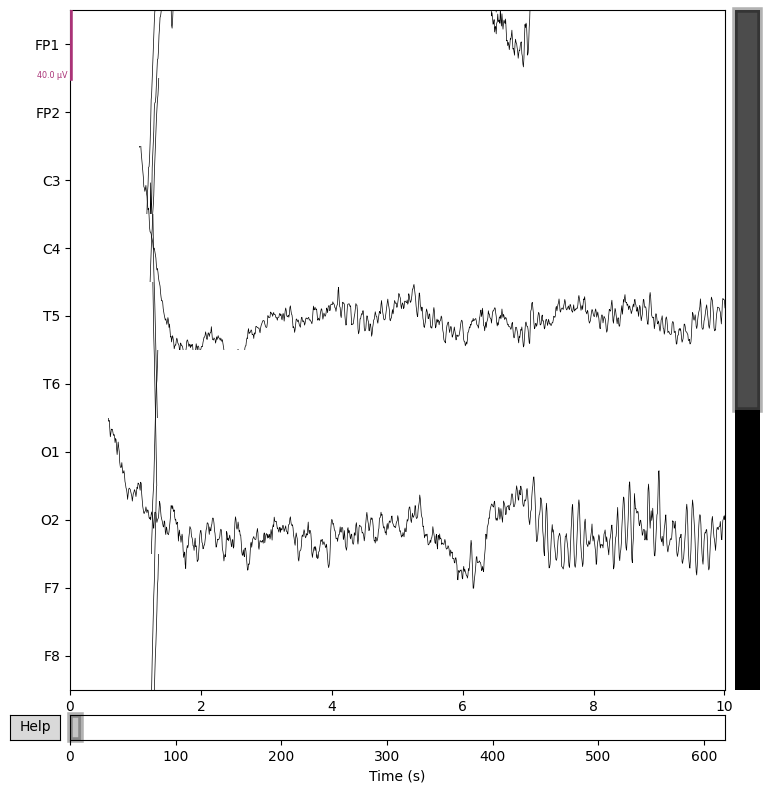

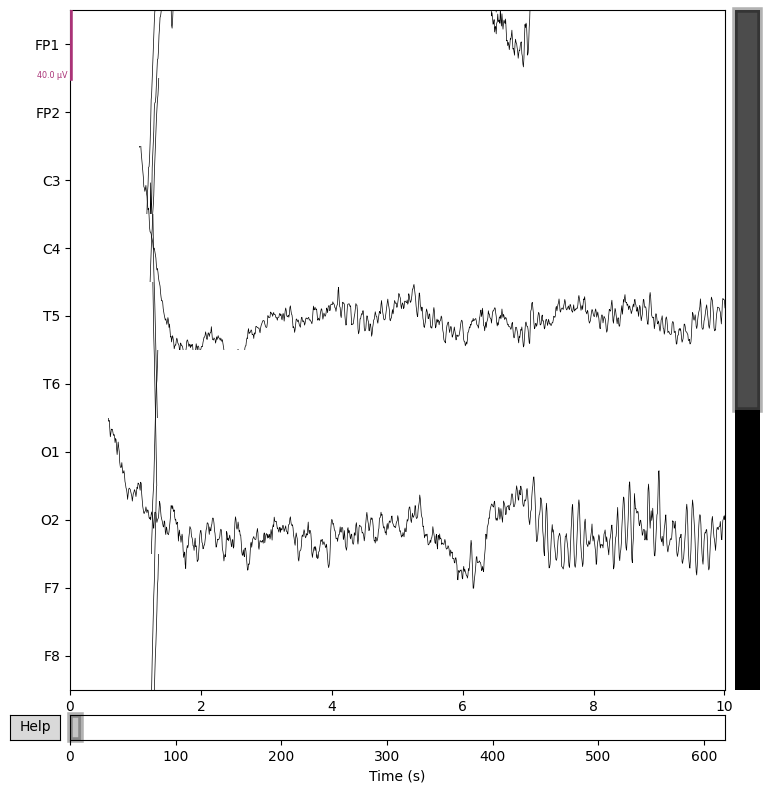

In [22]:
# Plot the raw data
raw.plot(n_channels=10, duration=10, title='Raw EEG Data')


Plot Power Spectral Density (PSD)

Effective window size : 16.384 (s)
Plotting power spectral density (dB=True).


<ipython-input-14-aa423f18319e>:5: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  fig = psd.plot()
<ipython-input-14-aa423f18319e>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = psd.plot()


Text(0.5, 0.98, 'Power Spectral Density')

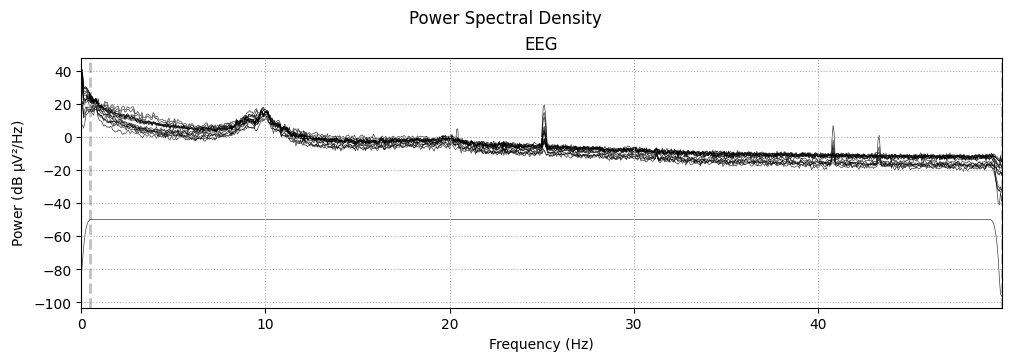

In [14]:
# Compute Power Spectral Density (PSD)
psd = raw.compute_psd(fmax=50)

# Plot PSD and add a title
fig = psd.plot()
fig.suptitle('Power Spectral Density')



In [16]:
help(raw.plot)

Help on method plot in module mne.io.base:

plot(events=None, duration=10.0, start=0.0, n_channels=20, bgcolor='w', color=None, bad_color='lightgray', event_color='cyan', scalings=None, remove_dc=True, order=None, show_options=False, title=None, show=True, block=False, highpass=None, lowpass=None, filtorder=4, clipping=1.5, show_first_samp=False, proj=True, group_by='type', butterfly=False, decim='auto', noise_cov=None, event_id=None, show_scrollbars=True, show_scalebars=True, time_format='float', precompute=None, use_opengl=None, *, picks=None, theme=None, overview_mode=None, splash=True, verbose=None) method of mne.io.edf.edf.RawEDF instance
    Plot raw data.
    
    Parameters
    ----------
    events : array | None
        Events to show with vertical bars.
    duration : float
        Time window (s) to plot. The lesser of this value and the duration
        of the raw file will be used.
    start : float
        Initial time to show (can be changed dynamically once plotted). I

Plot EEG Data with Events

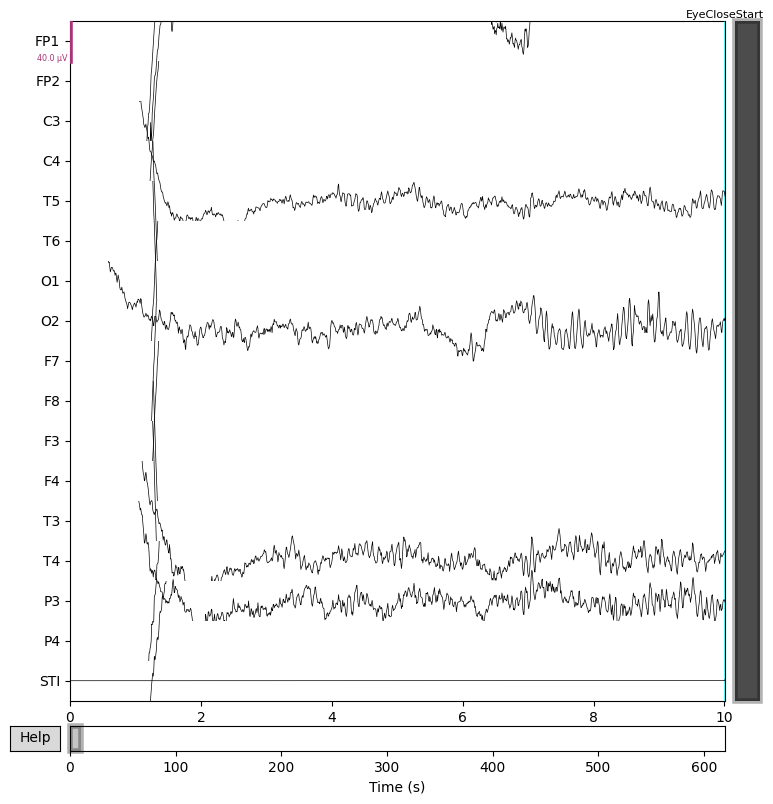

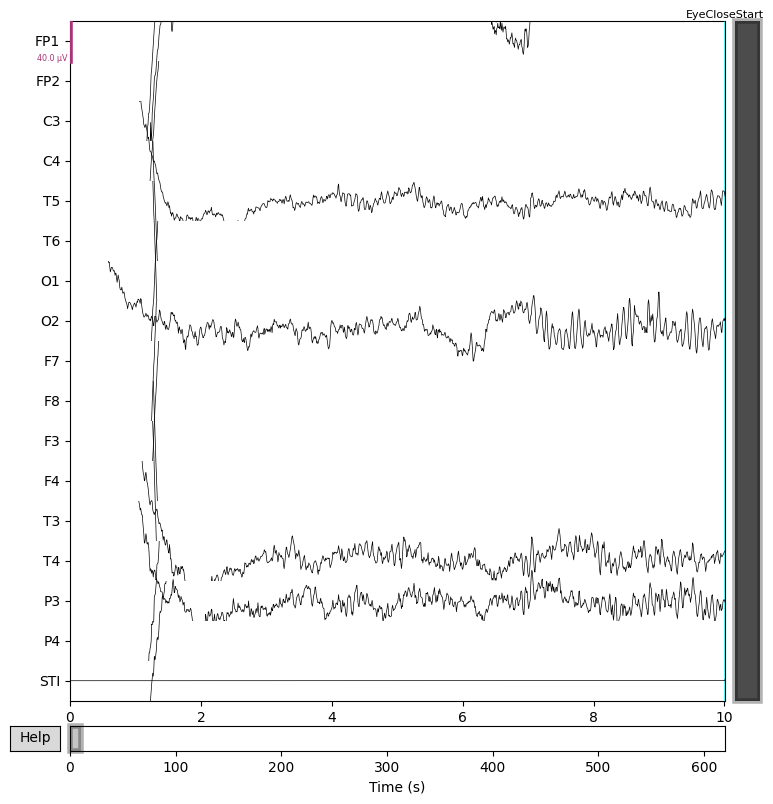

In [23]:
# Plot the raw data with events
raw.plot(events=mne_events, event_id=event_id, title='Raw EEG Data with Events')


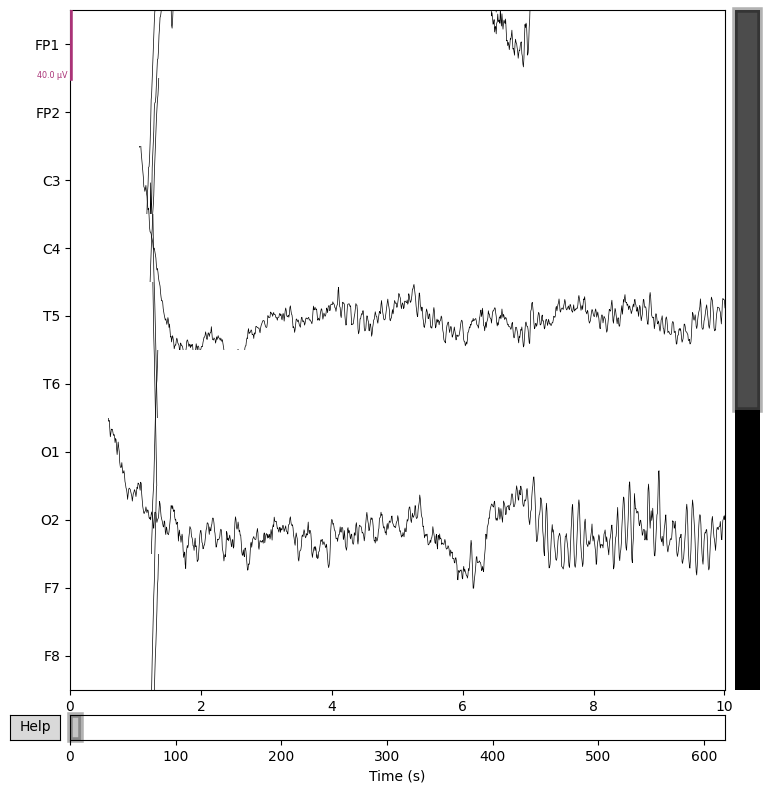

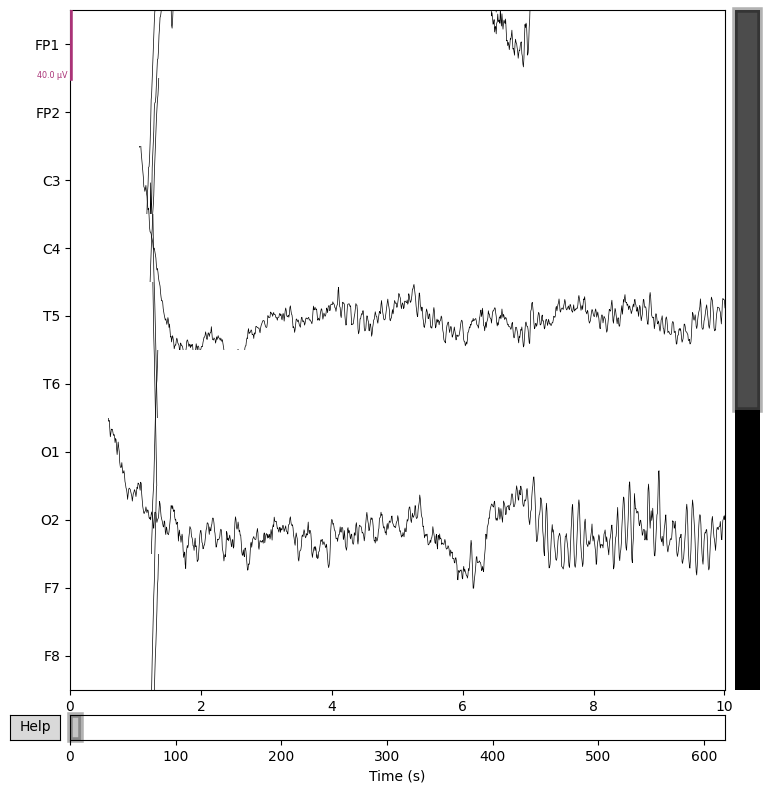

In [28]:
# Plot the raw data
raw.plot(n_channels=10, duration=10, title='Raw EEG Data')

Extracting EDF parameters from /content/drive/MyDrive/Internship_EEG_Data/10minRecording_EventsAdded.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77499  =      0.000 ...   619.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
/usr/local/lib/python3.10/dist-packages/pyedflib/edfwriter.py:124: UserWarning: Physical minimum for channel 0 (FP1) is -5.69684332190575e-05, which has 21 chars, however, EDF+ can only save 8 chars, will be truncated to -5.69684, some loss of precision is to be expected
  warnings.warn('Physical minimum for channel {} ({}) is {}, which has {} chars, '\
/usr/local/lib/python3.10/dist-packages/pyedflib/edfwriter.py:131: UserWarning: Physical minimum for channel 0 (FP1) is 4.627212001186353e-05, which has 21 chars, however, EDF+ can only save 8 chars, will be truncated to 4.627212, some loss of precision is to be expected.
  warnings.warn('Physical minimum for channel {} ({}) is {}, which has {} chars, '\


Saved: /mnt/data/eye_close1.edf


/usr/local/lib/python3.10/dist-packages/pyedflib/edfwriter.py:124: UserWarning: Physical minimum for channel 1 (FP2) is -5.12735415722574e-05, which has 21 chars, however, EDF+ can only save 8 chars, will be truncated to -5.12735, some loss of precision is to be expected
  warnings.warn('Physical minimum for channel {} ({}) is {}, which has {} chars, '\
/usr/local/lib/python3.10/dist-packages/pyedflib/edfwriter.py:131: UserWarning: Physical minimum for channel 1 (FP2) is 4.75975097120495e-05, which has 20 chars, however, EDF+ can only save 8 chars, will be truncated to 4.759750, some loss of precision is to be expected.
  warnings.warn('Physical minimum for channel {} ({}) is {}, which has {} chars, '\
/usr/local/lib/python3.10/dist-packages/pyedflib/edfwriter.py:124: UserWarning: Physical minimum for channel 2 (C3) is -2.643698655007104e-05, which has 22 chars, however, EDF+ can only save 8 chars, will be truncated to -2.64369, some loss of precision is to be expected
  warnings.warn(

Saved: /mnt/data/eye_open1.edf
Saved: /mnt/data/eye_close2.edf
Saved: /mnt/data/eye_open2.edf
Files in output directory:
eye_close2.edf
eye_close1.edf
eye_open2.edf
eye_open1.edf
Loading file: /mnt/data/eye_close1.edf
Extracting EDF parameters from /mnt/data/eye_close1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15124  =      0.000 ...   120.992 secs...


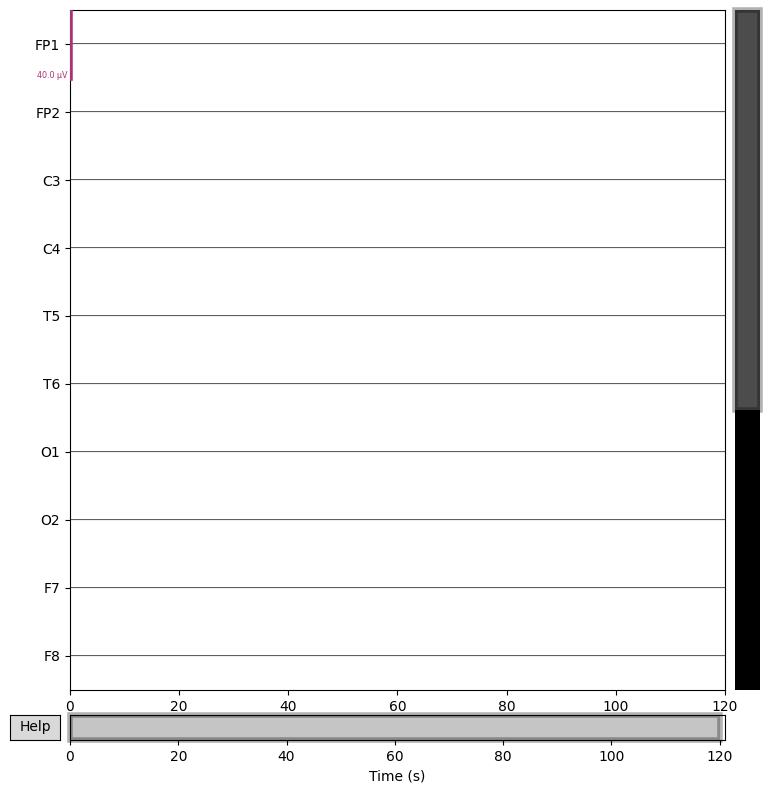

Loading file: /mnt/data/eye_open1.edf
Extracting EDF parameters from /mnt/data/eye_open1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15124  =      0.000 ...   120.992 secs...


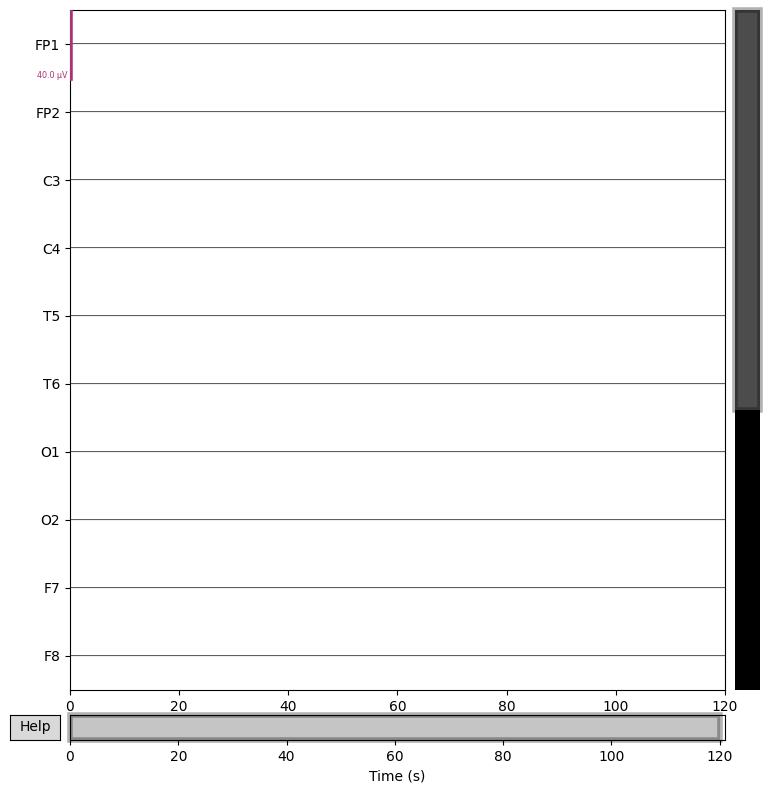

Loading file: /mnt/data/eye_close2.edf
Extracting EDF parameters from /mnt/data/eye_close2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12624  =      0.000 ...   100.992 secs...


<ipython-input-34-d1d4efb21d17>:76: RuntimeWarning: Physical range is not defined in following channels:
STI
  segment_data = mne.io.read_raw_edf(file_path, preload=True)


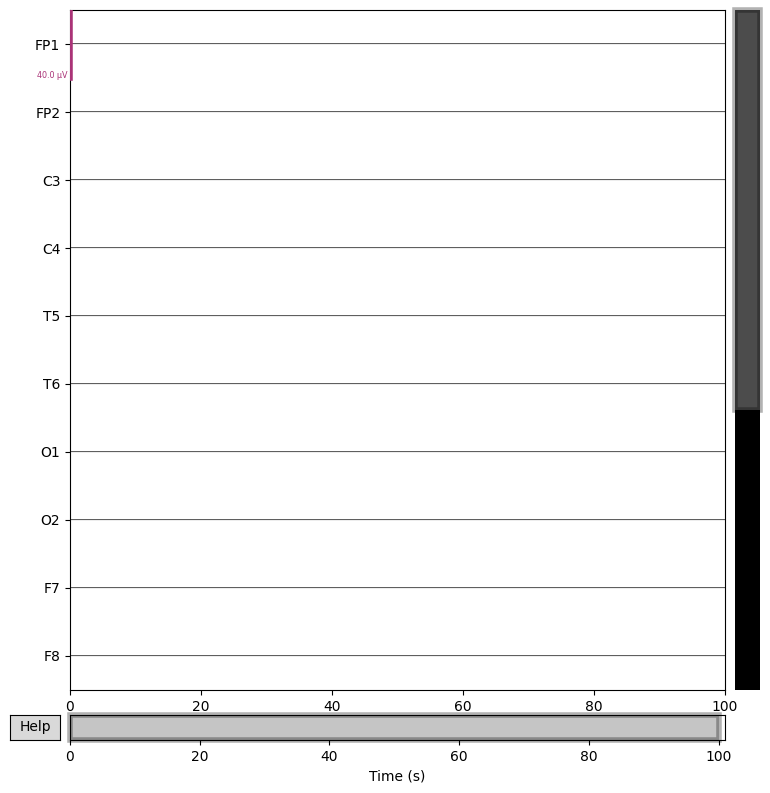

Loading file: /mnt/data/eye_open2.edf
Extracting EDF parameters from /mnt/data/eye_open2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15124  =      0.000 ...   120.992 secs...


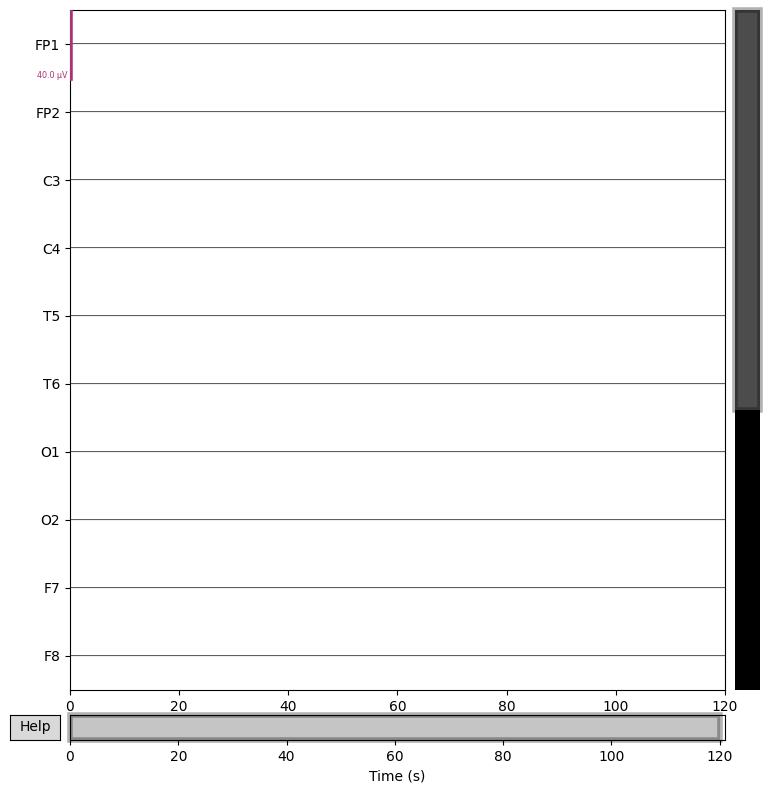

In [34]:
import os
import mne
import pyedflib
import numpy as np

# Load the EDF file
raw = mne.io.read_raw_edf('10minRecording_EventsAdded.edf', preload=True)

# Apply a Notch Filter at 50 Hz
raw.notch_filter(freqs=50)

# Apply a Butterworth Filter (0.5 Hz - 50 Hz)
raw.filter(l_freq=0.5, h_freq=50)

# Define segments based on events (start and end times in seconds)
segments = {
    'eye_close1': (10, 130),
    'eye_open1': (170, 290),
    'eye_close2': (330, 430),
    'eye_open2': (490, 610)
}

# Function to save as EDF using pyedflib
def save_as_edf(raw, filename):
    data = raw.get_data()
    n_channels = data.shape[0]
    ch_names = raw.info['ch_names']
    sfreq = int(raw.info['sfreq'])
    pmin = data.min(axis=1)
    pmax = data.max(axis=1)

    f = pyedflib.EdfWriter(filename, n_channels=n_channels, file_type=pyedflib.FILETYPE_EDFPLUS)

    channel_info = []
    for i in range(n_channels):
        ch_dict = {
            'label': ch_names[i],
            'dimension': 'uV',
            'sample_rate': sfreq,
            'physical_min': pmin[i],
            'physical_max': pmax[i],
            'digital_min': -32768,
            'digital_max': 32767,
            'transducer': '',
            'prefilter': ''
        }
        channel_info.append(ch_dict)

    f.setSignalHeaders(channel_info)
    f.writeSamples(data)
    f.close()
    print(f"Saved: {filename}")

# Set the output directory
output_dir = '/mnt/data/'  # Adjust as necessary
os.makedirs(output_dir, exist_ok=True)

# Save each segment as an EDF file
for name, (start, end) in segments.items():
    segment_data = raw.copy().crop(tmin=start, tmax=end)
    file_path = os.path.join(output_dir, f'{name}.edf')
    save_as_edf(segment_data, file_path)

# Verify if files are saved correctly
print("Files in output directory:")
for file in os.listdir(output_dir):
    print(file)

# Load and plot each segment to verify
for name in segments.keys():
    file_path = os.path.join(output_dir, f'{name}.edf')

    # Check if the file exists before attempting to read it
    if os.path.exists(file_path):
        print(f"Loading file: {file_path}")
        segment_data = mne.io.read_raw_edf(file_path, preload=True)
        segment_data.plot(n_channels=10, duration=(segments[name][1] - segments[name][0]), title=f'{name} Segment')
    else:
        print(f"File not found: {file_path}")
